In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import os

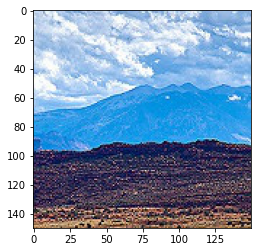

In [2]:
img = image.load_img("nature/seg_train/mountain/209.jpg")
plt.imshow(img)

In [3]:
cv2.imread("nature/seg_train/mountain/209.jpg").shape

(150, 150, 3)

In [4]:
train_set = ImageDataGenerator(rescale = 1.0/255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True)
test_set = ImageDataGenerator(rescale = 1.0/255)

In [5]:
train_data = train_set.flow_from_directory("nature/seg_train",
                                      target_size = (150,150),
                                      batch_size = 128,
                                      class_mode = "categorical")
valid_data = test_set.flow_from_directory("nature/seg_test",
                                      target_size = (150,150),
                                      batch_size = 128,
                                      class_mode = "categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [7]:
train_data.classes

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = "relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(128,activation = "relu"),
                                    ##
                                    tf.keras.layers.Dense(6, activation = "softmax")
                                   ])

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics= "accuracy")

In [10]:
model_fit = model.fit(train_data,
                     steps_per_epoch = len(train_data),
                     epochs = 10,
                     validation_data = valid_data)

Epoch 1/10
110/110 [==============================] - 1503s 14s/step - loss: 1.3400 - accuracy: 0.4705 - val_loss: 0.9915 - val_accuracy: 0.6373
Epoch 2/10
110/110 [==============================] - 900s 8s/step - loss: 0.8345 - accuracy: 0.6865 - val_loss: 0.7404 - val_accuracy: 0.7277
Epoch 3/10
110/110 [==============================] - 223s 2s/step - loss: 0.6850 - accuracy: 0.7507 - val_loss: 0.6208 - val_accuracy: 0.7787
Epoch 4/10
110/110 [==============================] - 250s 2s/step - loss: 0.6218 - accuracy: 0.7731 - val_loss: 0.6075 - val_accuracy: 0.7897
Epoch 5/10
110/110 [==============================] - 295s 3s/step - loss: 0.5611 - accuracy: 0.8034 - val_loss: 0.6785 - val_accuracy: 0.7637
Epoch 6/10
110/110 [==============================] - 284s 2s/step - loss: 0.5244 - accuracy: 0.8102 - val_loss: 0.6417 - val_accuracy: 0.7857
Epoch 7/10
110/110 [==============================] - 255s 2s/step - loss: 0.4847 - accuracy: 0.8253 - val_loss: 0.5613 - val_accuracy: 0.80

In [11]:
import numpy as np

In [12]:
names = np.array(['Buildings', 'Forest' ,'Glacier' ,'Mountain' ,'Sea' ,'Street'])

In [13]:
import os
pred = os.listdir("nature/seg_pred/")
import random
images = []
for i in range(20):
    images.append("nature/seg_pred/"+random.choice(pred))

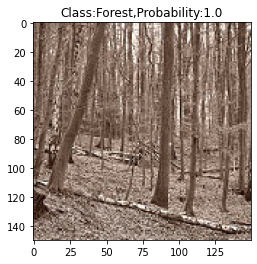

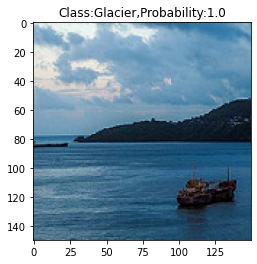

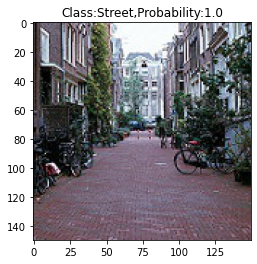

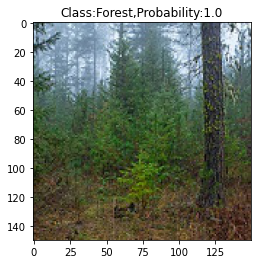

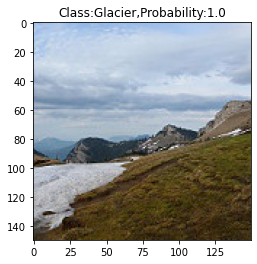

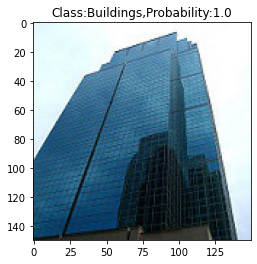

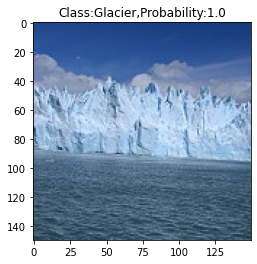

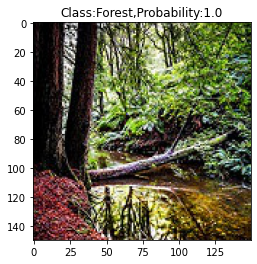

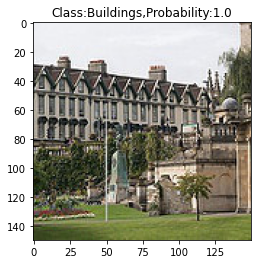

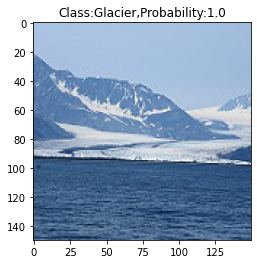

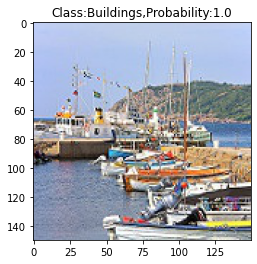

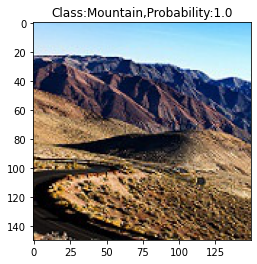

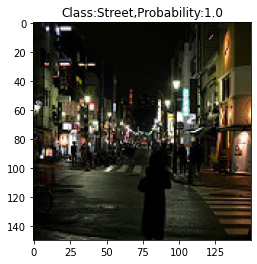

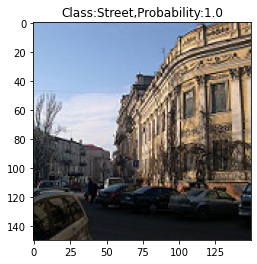

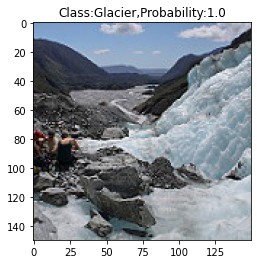

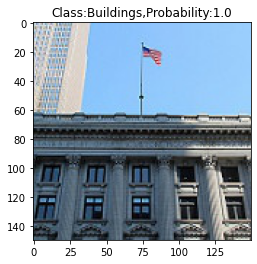

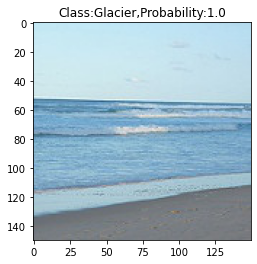

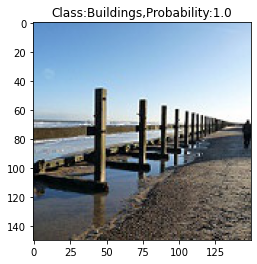

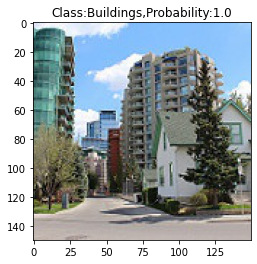

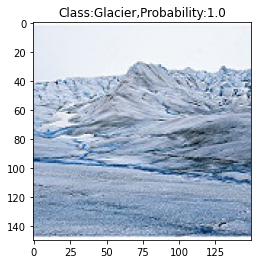

In [14]:
for img in images:
    #importing images
    test_img = image.load_img(img,target_size = (150,150))

    #converting image to array
    test_img = image.img_to_array(test_img)

    #we selected a batch size of 150 and it's a single photo, therefore we would be expanding it's dimensions.
    test_img = np.expand_dims(test_img,axis = 0)
    result = model.predict(test_img)
    plt.title('Class:{},Probability:{}'.format(names[result.argmax()],result.max()))
    
       #to print the image
    plt.imshow(image.img_to_array(image.load_img(img, target_size=(150,150)))/255.)
    plt.show()